#### 1.Discretization or Bining
it is the process of transforming continuous variables into discrete by reating a set of contiguous intervals that span the range of the variables valus.it is also called bining where bin is an alternative name for interval. 

##### why use?
    1.to handle outliers.
    2.to improve value spread.

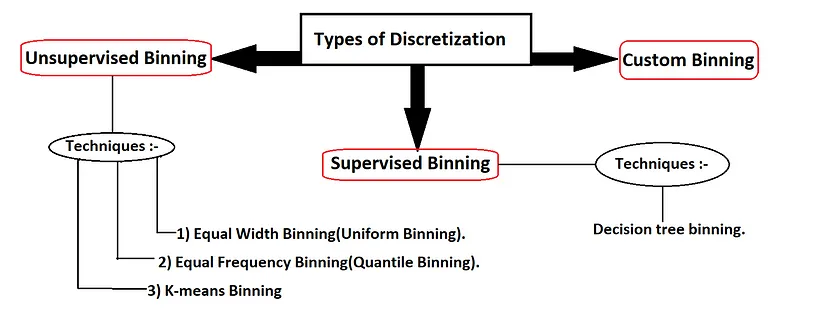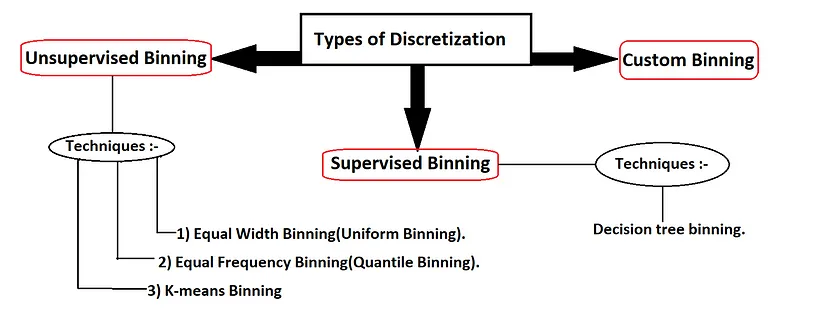

#### Unsupervised Binning :-

Unsupervised binning, also known as equal-width or equal-depth binning, divides the range of values into a predetermined number of bins without considering the target variable. The goal is to create bins of equal width or depth, where each bin contains an approximately equal number of data points.

#### Techniques of unsupervised binning :-

##### 1.Equal Width Binning (Uniform Binning) :-
This technique divides the range of values into a specified number of bins of equal width. It does not take into account the distribution of data within each bin. This method can result in uneven distribution of data points within bins if the data is not evenly distributed across the range.

Benefit :- To handle outlier and no change in the spread

##### 2.Equal Frequency Binning (Quantile Binning) :-
Equal frequency binning divides the range of values into bins such that each bin contains an equal number of data points. This technique aims to ensure an even distribution of data points within each bin.

Benefit :- To handle outlier and make value spread uniform

##### 3. K-Means Binning :- 
K-means binning is a technique that applies the k-means clustering algorithm to discretize continuous variables. It involves grouping similar data points into k clusters, where k represents the desired number of bins. The cluster centers are used as the bin boundaries.

#### Supervised Binning :-

Supervised binning, also known as optimal binning, considers the relationship between the variable you want to discretize and the target variable.

decision tree binning is a common technique used in supervised discretization.

By using decision tree binning, you can create bins that optimize the separation between different target classes, making it a useful technique for feature discretization in classification problems.

#### Custom Binning :-

Custom binning involves manually defining the bin boundaries based on domain knowledge or specific requirements.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [13]:
df=pd.read_csv('14.pipeline/with_pipeline/tested.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [14]:
df.isna().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [18]:
X=df.drop(['Survived'],axis=1)
X.head()

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875
3,27.0,8.6625
4,22.0,12.2875


In [19]:
y=df['Survived']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)
X_test.head()

,Age,Fare
176,20.0,36.7500
79,24.0,7.7500
18,27.0,7.9250
66,18.0,7.8792
16,35.0,12.3500


In [23]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.6268656716417911

In [68]:
print(np.mean(cross_val_score(dt,X_train,y_train,cv=9,scoring='accuracy')))

0.5871008939974458


In [94]:
kbin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')
kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')

trf=ColumnTransformer([
    ('first',kbin_age,[0]),
     ('second',kbin_fare,[1])
],remainder='passthrough')

X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

Dt=DecisionTreeClassifier()
Dt.fit(X_train_trf,y_train)
y_pred1=Dt.predict(X_test_trf)
print("Accuracy after transorm",accuracy_score(y_test,y_pred1))
print(np.mean(cross_val_score(Dt,X_train_trf,y_train,cv=10,scoring='accuracy')))


Accuracy after transorm 0.5074626865671642
0.5944444444444444


In [90]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [83]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.17, 14.65, 20.  , 22.  , 24.2 , 27.  , 30.  , 36.  , 41.4 ,
              48.7 , 64.  ])                                                ],
      dtype=object)

In [84]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [85]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [86]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
103,26.00,4.0,7.7750,1.0,"(24.2, 27.0]","(7.733, 7.896]"
250,0.92,0.0,27.7500,6.0,"(0.17, 14.65]","(26.0, 31.399]"
135,24.00,3.0,7.8542,1.0,"(22.0, 24.2]","(7.733, 7.896]"
377,21.00,2.0,11.5000,3.0,"(20.0, 22.0]","(9.5, 13.0]"
125,17.00,1.0,16.1000,4.0,"(14.65, 20.0]","(13.0, 16.75]"


#### 2. Binerization

converts into the value '0' and '1'